# Questions to ask:
## Term pregnancies
1. What are the common (i.e., prevalent) microbes (phylotypes) broken down by trimester?
2. Of the common phylotypes, what is their typical predominance (e.g., relative abundance). Normality? Modality?
3. How stable is the vaginal microbiome across a trimester? Between trimesters?
4. Are there differences between race / ethnicity (after correcting for other factors)
5. Are there differences between age?

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['svg.fonttype'] = 'none'
import seaborn as sns

## Load metadata and modify

In [4]:
md = pd.read_csv(
    "Training_data/metadata/metadata_normalized.csv",
)
md

,project,specimen,participant_id,collect_wk,age,Race: American Indian or Alaska Native,Race: Asian,Race: Black or African American,Race: Native Hawaiian or Other Pacific Islander,Race: Unknown,Race: White,Ethnicity: Hispanic or Latino,Ethnicity: Unknown
0,A,A00001-05,A00001,33.0,Unknown,1,0,0,0,0,0,0,1
1,A,A00002-01,A00002,38.0,Unknown,0,0,0,0,0,1,0,1
2,A,A00003-02,A00003,30.0,Unknown,0,1,0,0,0,0,0,1
3,A,A00004-08,A00004,27.0,Unknown,0,0,0,0,0,1,0,1
4,A,A00004-12,A00004,29.0,Unknown,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3573,J,J00111-01,J00111,17.0,27,0,0,0,0,0,1,0,1
3574,J,J00112-01,J00112,19.0,27,0,0,0,0,0,1,0,1
3575,J,J00113-01,J00113,16.0,32,0,0,0,0,0,1,0,1
3576,J,J00115-01,J00115,18.0,35,0,0,0,0,0,1,0,1


In [5]:
md['Trimester'] = md.collect_wk.apply(lambda w: 1 if w <= 13 else 3 if w >= 27 else 2)
md

,project,specimen,participant_id,collect_wk,age,Race: American Indian or Alaska Native,Race: Asian,Race: Black or African American,Race: Native Hawaiian or Other Pacific Islander,Race: Unknown,Race: White,Ethnicity: Hispanic or Latino,Ethnicity: Unknown,Trimester
0,A,A00001-05,A00001,33.0,Unknown,1,0,0,0,0,0,0,1,3
1,A,A00002-01,A00002,38.0,Unknown,0,0,0,0,0,1,0,1,3
2,A,A00003-02,A00003,30.0,Unknown,0,1,0,0,0,0,0,1,3
3,A,A00004-08,A00004,27.0,Unknown,0,0,0,0,0,1,0,1,3
4,A,A00004-12,A00004,29.0,Unknown,0,0,0,0,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3573,J,J00111-01,J00111,17.0,27,0,0,0,0,0,1,0,1,2
3574,J,J00112-01,J00112,19.0,27,0,0,0,0,0,1,0,1,2
3575,J,J00113-01,J00113,16.0,32,0,0,0,0,0,1,0,1,2
3576,J,J00115-01,J00115,18.0,35,0,0,0,0,0,1,0,1,2


In [6]:
md["Race"] = [
    row[row == 1].index[0].replace("Race: ", "") if row.sum() == 1
    else "Mixed"
    for i, row in 
    md[[c for c in md.columns if c.startswith("Race:")]].iterrows()
]

### Try to split age into three categories:
- Below_18
- Above_38
- 18_to_38


In [7]:
try:
    del decode_age
except:
    pass
def decode_age(age):
    if age.strip() == 'Unknown':
        return 'Unknown'
    # Implicit else
    if age.strip() == '18_to_28':
        return "18 to 38"
    if age.strip() == 'Above_38':
        return 'Above 38'
    if age.strip() == 'Below_18':
        return 'Below 18'
    if age.strip() == '29-38':
        return "18 to 38"
    # implicit else (it's likely numeric)
    age = float(age)
    if age < 18:
        return 'Below 18'
    # Implicit else
    if age > 38:
        return 'Above 38'
    
    return '18 to 38'

md['Age_Category'] = md.age.apply(decode_age)    
md.groupby('Age_Category').count()

,project,specimen,participant_id,collect_wk,age,Race: American Indian or Alaska Native,Race: Asian,Race: Black or African American,Race: Native Hawaiian or Other Pacific Islander,Race: Unknown,Race: White,Ethnicity: Hispanic or Latino,Ethnicity: Unknown,Trimester,Race
Age_Category,,,,,,,,,,,,,,,
18 to 38,1759,1759,1759,1759,1759,1759,1759,1759,1759,1759,1759,1759,1759,1759,1759
Above 38,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105
Below 18,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
Unknown,1702,1702,1702,1702,1702,1702,1702,1702,1702,1702,1702,1702,1702,1702,1702


In [9]:
p_dw = {
    r.participant_id: int(r.delivery_wk)
    for i, r in
    pd.read_csv(
        "Training_data/key/answer_key_by_participant.csv"
    ).iterrows()
}
p_dw
md['delivery_wk'] = md.participant_id.apply(p_dw.get)
md['Term'] = md.delivery_wk >= 37

md.head()

,project,specimen,participant_id,collect_wk,age,Race: American Indian or Alaska Native,Race: Asian,Race: Black or African American,Race: Native Hawaiian or Other Pacific Islander,Race: Unknown,Race: White,Ethnicity: Hispanic or Latino,Ethnicity: Unknown,Trimester,Race,Age_Category,delivery_wk,Term
0,A,A00001-05,A00001,33.0,Unknown,1,0,0,0,0,0,0,1,3,American Indian or Alaska Native,Unknown,38,True
1,A,A00002-01,A00002,38.0,Unknown,0,0,0,0,0,1,0,1,3,White,Unknown,40,True
2,A,A00003-02,A00003,30.0,Unknown,0,1,0,0,0,0,0,1,3,Asian,Unknown,40,True
3,A,A00004-08,A00004,27.0,Unknown,0,0,0,0,0,1,0,1,3,White,Unknown,40,True
4,A,A00004-12,A00004,29.0,Unknown,0,0,0,0,0,1,0,1,3,White,Unknown,40,True


In [10]:
ptw_1e_1 = pd.read_csv(
    "Training_data/phylotypes/phylotype_relabd.1e_1.csv",
    index_col=0
)
# rename the phylotypes to something more collision resistant: pt_reference.ver_dist__num
# The baseline for this data would be: pt__vaginal.202208__0.1__num
ptw_1e_1.columns = ptw_1e_1.columns.map(lambda pt: pt.replace('pt__', 'pt__vaginal.202208__0.1____'))
ptw_1e_1

,pt__vaginal.202208__0.1____00001,pt__vaginal.202208__0.1____00002,pt__vaginal.202208__0.1____00003,pt__vaginal.202208__0.1____00004,pt__vaginal.202208__0.1____00005,pt__vaginal.202208__0.1____00006,pt__vaginal.202208__0.1____00007,pt__vaginal.202208__0.1____00008,pt__vaginal.202208__0.1____00009,pt__vaginal.202208__0.1____00010,...,pt__vaginal.202208__0.1____09708,pt__vaginal.202208__0.1____09709,pt__vaginal.202208__0.1____09710,pt__vaginal.202208__0.1____09711,pt__vaginal.202208__0.1____09712,pt__vaginal.202208__0.1____09713,pt__vaginal.202208__0.1____09714,pt__vaginal.202208__0.1____09715,pt__vaginal.202208__0.1____09716,pt__vaginal.202208__0.1____09717
specimen,,,,,,,,,,,,,,,,,,,,,
A00001-05,0.593176,0.0,0.0,0.000000,0.121260,0.0,0.003675,0.005774,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00002-01,0.001226,0.0,0.0,0.000000,0.000613,0.0,0.000000,0.000613,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00003-02,0.000000,0.0,0.0,0.000000,0.002591,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00004-08,0.927544,0.0,0.0,0.000000,0.000000,0.0,0.000514,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00004-12,0.806593,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
J00111-01,0.994886,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
J00112-01,0.014129,0.0,0.0,0.141649,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
J00113-01,0.476964,0.0,0.0,0.001736,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
ptw_5e_1 = pd.read_csv(
    "Training_data/phylotypes/phylotype_relabd.5e_1.csv",
    index_col=0
)
# rename the phylotypes to something more collision resistant: pt_reference.ver_dist__num
# The baseline for this data would be: pt__vaginal.202208__0.5__num
ptw_5e_1.columns = ptw_5e_1.columns.map(lambda pt: pt.replace('pt__', 'pt__vaginal.202208__0.5____'))
ptw_5e_1

,pt__vaginal.202208__0.5____00001,pt__vaginal.202208__0.5____00002,pt__vaginal.202208__0.5____00003,pt__vaginal.202208__0.5____00004,pt__vaginal.202208__0.5____00005,pt__vaginal.202208__0.5____00006,pt__vaginal.202208__0.5____00007,pt__vaginal.202208__0.5____00008,pt__vaginal.202208__0.5____00009,pt__vaginal.202208__0.5____00010,...,pt__vaginal.202208__0.5____03615,pt__vaginal.202208__0.5____03616,pt__vaginal.202208__0.5____03617,pt__vaginal.202208__0.5____03618,pt__vaginal.202208__0.5____03619,pt__vaginal.202208__0.5____03620,pt__vaginal.202208__0.5____03621,pt__vaginal.202208__0.5____03622,pt__vaginal.202208__0.5____03623,pt__vaginal.202208__0.5____03624
specimen,,,,,,,,,,,,,,,,,,,,,
A00001-05,0.000525,0.083465,0.121260,0.000000,0.000000,0.000000,0.0,0.000000,0.007349,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
A00002-01,0.000000,0.803188,0.001226,0.000000,0.000000,0.000613,0.0,0.000000,0.009810,0.0,...,0.000613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
A00003-02,0.001079,0.960708,0.002591,0.000000,0.000000,0.011442,0.0,0.000000,0.000216,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
A00004-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.004625,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000514,0.0
A00004-12,0.000000,0.000000,0.000000,0.000366,0.000000,0.000366,0.0,0.000733,0.000183,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
J00111-01,0.000000,0.004992,0.000122,0.000000,0.994886,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
J00112-01,0.000000,0.842958,0.141649,0.000000,0.014129,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
J00113-01,0.000000,0.004733,0.001736,0.000000,0.396655,0.000631,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [14]:
ptw_1e0 = pd.read_csv(
    "Training_data/phylotypes/phylotype_relabd.1e0.csv",
    index_col=0
)
# rename the phylotypes to something more collision resistant: pt_reference.ver_dist__num
# The baseline for this data would be: pt__vaginal.202208__0.1__num
ptw_1e0.columns = ptw_1e0.columns.map(lambda pt: pt.replace('pt__', 'pt__vaginal.202208__1.0____'))
ptw_1e0


,pt__vaginal.202208__1.0____00001,pt__vaginal.202208__1.0____00002,pt__vaginal.202208__1.0____00003,pt__vaginal.202208__1.0____00004,pt__vaginal.202208__1.0____00005,pt__vaginal.202208__1.0____00006,pt__vaginal.202208__1.0____00007,pt__vaginal.202208__1.0____00008,pt__vaginal.202208__1.0____00009,pt__vaginal.202208__1.0____00010,...,pt__vaginal.202208__1.0____01835,pt__vaginal.202208__1.0____01836,pt__vaginal.202208__1.0____01837,pt__vaginal.202208__1.0____01838,pt__vaginal.202208__1.0____01839,pt__vaginal.202208__1.0____01840,pt__vaginal.202208__1.0____01841,pt__vaginal.202208__1.0____01842,pt__vaginal.202208__1.0____01843,pt__vaginal.202208__1.0____01844
specimen,,,,,,,,,,,,,,,,,,,,,
A00001-05,0.797900,0.023097,0.002100,0.008924,0.007349,0.000000,0.106037,0.0,0.009449,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00002-01,0.805641,0.000613,0.006131,0.042305,0.010423,0.000000,0.000613,0.0,0.001839,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00003-02,0.963299,0.000648,0.001079,0.000000,0.011658,0.000000,0.000216,0.0,0.001079,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00004-08,0.927544,0.000514,0.001028,0.009250,0.004625,0.000000,0.027235,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00004-12,0.806593,0.000366,0.000549,0.014286,0.000549,0.000366,0.142857,0.0,0.000916,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
J00111-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
J00112-01,0.999644,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
J00113-01,0.483433,0.038340,0.000000,0.000000,0.000631,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Get a pt -> Taxonomy mapping (best effort)
sv_tax = pd.read_csv(
    "Training_data/taxonomy/sv_taxonomy.csv"
)
sv_pt1e_1 = {
    r.sv: r.phylotype.replace('pt__', 'pt__vaginal.202208__0.1____')
    for (i, r) in
    pd.read_csv(
        "Training_data/phylotypes/pt.1e-1.csv"
    ).iterrows()
}
sv_pt5e_1 = {
    r.sv: r.phylotype.replace('pt__', 'pt__vaginal.202208__0.5____')
    for (i, r) in
    pd.read_csv(
        "Training_data/phylotypes/pt.5e-1.csv"
    ).iterrows()
}
sv_pt1e0 = {
    r.sv: r.phylotype.replace('pt__', 'pt__vaginal.202208__1.0____')
    for (i, r) in
    pd.read_csv(
        "Training_data/phylotypes/pt.1e0.csv"
    ).iterrows()
}
sv_tax['pt1e_1'] = sv_tax.sv.apply(sv_pt1e_1.get)
sv_tax['pt5e_1'] = sv_tax.sv.apply(sv_pt5e_1.get)
sv_tax['pt1e0'] = sv_tax.sv.apply(sv_pt1e0.get)

pt_sp = {
    pt: ptt.tax_name
    for pt, ptt in
    sv_tax[
        sv_tax['rank'] == 'species'
    ].groupby([
        'pt1e_1', 'tax_name'
    ]).count().sort_values(
        'sv',
        ascending=False
    ).reset_index().groupby(
        'pt1e_1'
    ).first().iterrows()
}
pt_sp.update({
    pt: ptt.tax_name
    for pt, ptt in
    sv_tax[
        sv_tax['rank'] == 'species'
    ].groupby([
        'pt5e_1', 'tax_name'
    ]).count().sort_values(
        'sv',
        ascending=False
    ).reset_index().groupby(
        'pt5e_1'
    ).first().iterrows()
})
pt_sp.update({
    pt: ptt.tax_name
    for pt, ptt in
    sv_tax[
        sv_tax['rank'] == 'species'
    ].groupby([
        'pt1e0', 'tax_name'
    ]).count().sort_values(
        'sv',
        ascending=False
    ).reset_index().groupby(
        'pt1e0'
    ).first().iterrows()
})
# Phylotypes with no species-level ID
ptnosp = set(ptw_1e0.columns).union(set(ptw_5e_1.columns)).union(set(ptw_1e_1.columns)) - set(pt_sp.keys())
print(
    len(ptnosp),
    len(pt_sp)
)

pt_sp.update({
    pt: ptt.tax_name+" spp."
    for pt, ptt in
    sv_tax[
        (sv_tax['want_rank'] == 'species') &
        (sv_tax.pt1e_1.apply(lambda pt: pt in ptnosp))
    ].groupby([
        'pt1e_1', 'tax_name'
    ]).count().sort_values(
        'sv',
        ascending=False
    ).reset_index().groupby(
        'pt1e_1'
    ).first().iterrows()
})

pt_sp.update({
    pt: ptt.tax_name+" spp."
    for pt, ptt in
    sv_tax[
        (sv_tax['want_rank'] == 'species') &
        (sv_tax.pt5e_1.apply(lambda pt: pt in ptnosp))
    ].groupby([
        'pt5e_1', 'tax_name'
    ]).count().sort_values(
        'sv',
        ascending=False
    ).reset_index().groupby(
        'pt5e_1'
    ).first().iterrows()
})
pt_sp.update({
    pt: ptt.tax_name+" spp."
    for pt, ptt in
    sv_tax[
        (sv_tax['want_rank'] == 'species') &
        (sv_tax.pt1e0.apply(lambda pt: pt in ptnosp))
    ].groupby([
        'pt1e0', 'tax_name'
    ]).count().sort_values(
        'sv',
        ascending=False
    ).reset_index().groupby(
        'pt1e0'
    ).first().iterrows()
})
set(ptw_1e0.columns).union(set(ptw_5e_1.columns)).union(set(ptw_1e_1.columns)) - set(pt_sp.keys())

13019 2166


set()

In [18]:
pt_sp

{'pt__vaginal.202208__0.1____00001': 'Lactobacillus iners',
 'pt__vaginal.202208__0.1____00002': 'Gardnerella vaginalis',
 'pt__vaginal.202208__0.1____00004': 'Lactobacillus jensenii',
 'pt__vaginal.202208__0.1____00005': 'Lactobacillus gasseri',
 'pt__vaginal.202208__0.1____00006': 'Pseudomonas fluorescens/veronii',
 'pt__vaginal.202208__0.1____00007': 'Staphylococcus epidermidis',
 'pt__vaginal.202208__0.1____00008': 'Prevotella timonensis',
 'pt__vaginal.202208__0.1____00009': 'Lactobacillus crispatus',
 'pt__vaginal.202208__0.1____00010': 'Aerococcus christensenii',
 'pt__vaginal.202208__0.1____00011': 'Prevotella amnii',
 'pt__vaginal.202208__0.1____00012': 'Prevotella buccalis',
 'pt__vaginal.202208__0.1____00013': 'Ureaplasma parvum',
 'pt__vaginal.202208__0.1____00014': 'Gardnerella vaginalis',
 'pt__vaginal.202208__0.1____00015': 'Achromobacter xylosoxidans',
 'pt__vaginal.202208__0.1____00016': 'Finegoldia magna',
 'pt__vaginal.202208__0.1____00017': 'Atopobium vaginae',
 'pt

In [20]:
projects = sorted(md.project.unique())
projects

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

## What are the common (i.e., prevalent) microbes (phylotypes) broken down by trimester?

In [21]:
# Key is trimester...
pt1e0_prev_by_project = {}
pt1e0_prev_mean = {}
for trimester in [1,2,3]:
    tmw = ptw_1e0.loc[
        md[(md.Trimester == trimester) & md.Term].specimen
    ]
    pt1e0_prev_mean[trimester] = (tmw > 0).sum(axis=0) / len(tmw)
    by_project = pd.DataFrame(
        columns=projects,
        index=tmw.columns,
    )
    for proj in projects:
        pjw = ptw_1e0.loc[
            md[(md.Trimester == trimester) & (md.project == proj) & md.Term].specimen
        ]
        if len(pjw) == 0:  # No specimens that fit this criteria
            by_project.drop(proj, axis=1, inplace=True)
        else:
            by_project[proj] = (pjw >0).sum(axis=0) / len(pjw)
        
    pt1e0_prev_by_project[trimester] = by_project

In [22]:
pt1e0_prev_by_project

{1:                                          A    B         D    E         F  \
 pt__vaginal.202208__1.0____00001  0.941176  0.6  1.000000  0.0  0.000000   
 pt__vaginal.202208__1.0____00002  0.764706  0.4  0.583333  0.0  0.111111   
 pt__vaginal.202208__1.0____00003  0.823529  0.2  0.083333  0.0  0.222222   
 pt__vaginal.202208__1.0____00004  0.823529  0.2  0.250000  0.0  0.000000   
 pt__vaginal.202208__1.0____00005  1.000000  0.0  0.166667  0.0  0.833333   
 ...                                    ...  ...       ...  ...       ...   
 pt__vaginal.202208__1.0____01840  0.000000  0.0  0.000000  0.0  0.000000   
 pt__vaginal.202208__1.0____01841  0.000000  0.0  0.000000  0.0  0.055556   
 pt__vaginal.202208__1.0____01842  0.000000  0.0  0.000000  0.0  0.000000   
 pt__vaginal.202208__1.0____01843  0.000000  0.0  0.000000  0.0  0.000000   
 pt__vaginal.202208__1.0____01844  0.000000  0.0  0.000000  0.0  0.055556   
 
                                         G         H    J  
 pt__vagina

In [24]:
# Key is trimester...
pt5e_1_prev_by_project = {}
pt5e_1_prev_mean = {}
for trimester in [1,2,3]:
    tmw = ptw_5e_1.loc[
        md[(md.Trimester == trimester) & md.Term].specimen
    ]
    pt5e_1_prev_mean[trimester] = (tmw > 0).sum(axis=0) / len(tmw)
    by_project = pd.DataFrame(
        columns=projects,
        index=tmw.columns,
    )
    for proj in projects:
        pjw = ptw_5e_1.loc[
            md[(md.Trimester == trimester) & (md.project == proj) & md.Term].specimen
        ]
        if len(pjw) == 0:  # No specimens that fit this criteria
            by_project.drop(proj, axis=1, inplace=True)
        else:
            by_project[proj] = (pjw >0).sum(axis=0) / len(pjw)
        
    pt5e_1_prev_by_project[trimester] = by_project

In [25]:
# Key is trimester...
pt1e_1_prev_by_project = {}
pt1e_1_prev_mean = {}
for trimester in [1,2,3]:
    tmw = ptw_1e_1.loc[
        md[(md.Trimester == trimester) & md.Term].specimen
    ]
    pt1e_1_prev_mean[trimester] = (tmw > 0).sum(axis=0) / len(tmw)
    by_project = pd.DataFrame(
        columns=projects,
        index=tmw.columns,
    )
    for proj in projects:
        pjw = ptw_1e_1.loc[
            md[(md.Trimester == trimester) & (md.project == proj) & md.Term].specimen
        ]
        if len(pjw) == 0:  # No specimens that fit this criteria
            by_project.drop(proj, axis=1, inplace=True)
        else:
            by_project[proj] = (pjw >0).sum(axis=0) / len(pjw)
        
    pt1e_1_prev_by_project[trimester] = by_project

<AxesSubplot: >

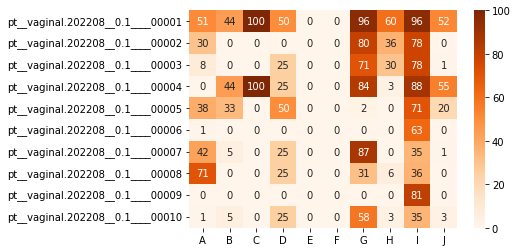

In [26]:
sns.heatmap(
    (pt1e_1_prev_by_project[2].iloc[:10] * 100).astype(int),
    cmap='Oranges',
    vmin=0,
    vmax=100,
    annot=True,
    fmt='d'
)

In [27]:
pt1e_1_prev_by_project

{1:                                          A    B         D    E    F       G  \
 pt__vaginal.202208__0.1____00001  0.529412  0.2  0.333333  0.0  0.0  0.8125   
 pt__vaginal.202208__0.1____00002  0.176471  0.0  0.000000  0.0  0.0  0.3750   
 pt__vaginal.202208__0.1____00003  0.117647  0.0  0.083333  0.0  0.0  0.1875   
 pt__vaginal.202208__0.1____00004  0.000000  0.4  0.250000  0.0  0.0  0.6875   
 pt__vaginal.202208__0.1____00005  0.588235  0.4  0.583333  0.0  0.0  0.0000   
 ...                                    ...  ...       ...  ...  ...     ...   
 pt__vaginal.202208__0.1____09713  0.000000  0.0  0.000000  0.0  0.0  0.0000   
 pt__vaginal.202208__0.1____09714  0.000000  0.0  0.000000  0.0  0.0  0.0000   
 pt__vaginal.202208__0.1____09715  0.000000  0.0  0.000000  0.0  0.0  0.0000   
 pt__vaginal.202208__0.1____09716  0.000000  0.0  0.000000  0.0  0.0  0.0000   
 pt__vaginal.202208__0.1____09717  0.000000  0.0  0.000000  0.0  0.0  0.0000   
 
                                   

<AxesSubplot: >

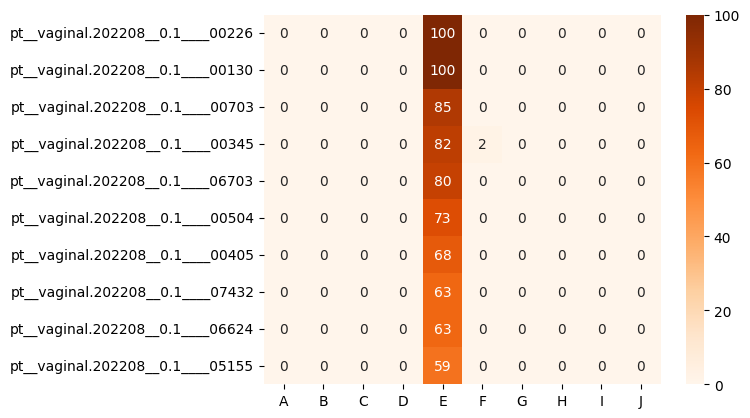

In [17]:
sns.heatmap(
    (pt1e_1_prev_by_project[2].sort_values('E', ascending=False).iloc[:10] * 100).astype(int),
    cmap='Oranges',
    vmin=0,
    vmax=100,
    annot=True,
    fmt='d'
)

<AxesSubplot: >

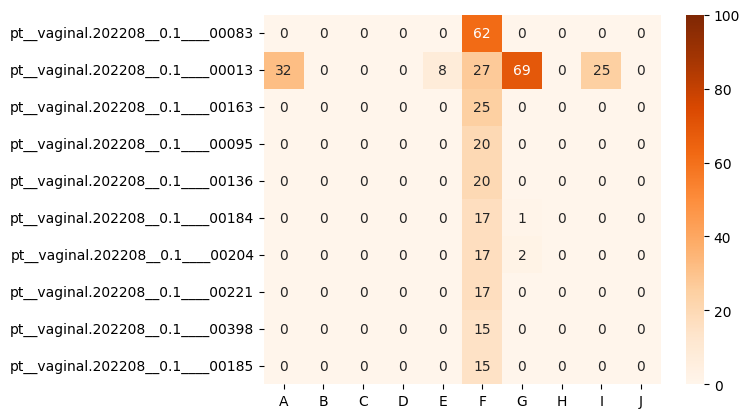

In [18]:
sns.heatmap(
    (pt1e_1_prev_by_project[2].sort_values('F', ascending=False).iloc[:10] * 100).astype(int),
    cmap='Oranges',
    vmin=0,
    vmax=100,
    annot=True,
    fmt='d'
)

In [19]:
pt1e_1_prev_by_project[2].sort_values('E', ascending=False)

,A,B,C,D,E,F,G,H,I,J
pt__vaginal.202208__0.1____00226,0.0,0.0,0.0,0.0,1.000000,0.000,0.0,0.0,0.000000,0.0
pt__vaginal.202208__0.1____00130,0.0,0.0,0.0,0.0,1.000000,0.000,0.0,0.0,0.000000,0.0
pt__vaginal.202208__0.1____00703,0.0,0.0,0.0,0.0,0.859649,0.000,0.0,0.0,0.000000,0.0
pt__vaginal.202208__0.1____00345,0.0,0.0,0.0,0.0,0.824561,0.025,0.0,0.0,0.000000,0.0
pt__vaginal.202208__0.1____06703,0.0,0.0,0.0,0.0,0.807018,0.000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
pt__vaginal.202208__0.1____03254,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.000000,0.0
pt__vaginal.202208__0.1____03255,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.000000,0.0
pt__vaginal.202208__0.1____03256,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.000814,0.0
pt__vaginal.202208__0.1____03257,0.0,0.0,0.0,0.0,0.000000,0.025,0.0,0.0,0.000000,0.0


In [20]:
pt1e_1_prev_by_project[2].sort_values('F', ascending=False)

,A,B,C,D,E,F,G,H,I,J
pt__vaginal.202208__0.1____00083,0.000000,0.0,0.0,0.0,0.000000,0.625,0.000000,0.0,0.000000,0.0
pt__vaginal.202208__0.1____00013,0.328571,0.0,0.0,0.0,0.087719,0.275,0.695652,0.0,0.253865,0.0
pt__vaginal.202208__0.1____00163,0.000000,0.0,0.0,0.0,0.000000,0.250,0.003344,0.0,0.000000,0.0
pt__vaginal.202208__0.1____00095,0.000000,0.0,0.0,0.0,0.000000,0.200,0.000000,0.0,0.000000,0.0
pt__vaginal.202208__0.1____00136,0.000000,0.0,0.0,0.0,0.000000,0.200,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
pt__vaginal.202208__0.1____03312,0.000000,0.0,0.0,0.0,0.052632,0.000,0.000000,0.0,0.000000,0.0
pt__vaginal.202208__0.1____03311,0.000000,0.0,0.0,0.0,0.000000,0.000,0.000000,0.0,0.000000,0.0
pt__vaginal.202208__0.1____03310,0.000000,0.0,0.0,0.0,0.000000,0.000,0.000000,0.0,0.000000,0.0
pt__vaginal.202208__0.1____03309,0.000000,0.0,0.0,0.0,0.017544,0.000,0.000000,0.0,0.000000,0.0


In [21]:
pt1e_1_prev_by_project[1]

,A,B,D,E,F,G,H,J
pt__vaginal.202208__0.1____00001,0.529412,0.2,0.333333,0.0,0.0,0.8125,0.391304,0.6
pt__vaginal.202208__0.1____00002,0.176471,0.0,0.000000,0.0,0.0,0.3750,0.260870,0.0
pt__vaginal.202208__0.1____00003,0.117647,0.0,0.083333,0.0,0.0,0.1875,0.304348,0.0
pt__vaginal.202208__0.1____00004,0.000000,0.4,0.250000,0.0,0.0,0.6875,0.043478,0.8
pt__vaginal.202208__0.1____00005,0.588235,0.4,0.583333,0.0,0.0,0.0000,0.000000,0.0
...,...,...,...,...,...,...,...,...
pt__vaginal.202208__0.1____09713,0.000000,0.0,0.000000,0.0,0.0,0.0000,0.000000,0.0
pt__vaginal.202208__0.1____09714,0.000000,0.0,0.000000,0.0,0.0,0.0000,0.000000,0.0
pt__vaginal.202208__0.1____09715,0.000000,0.0,0.000000,0.0,0.0,0.0000,0.000000,0.0
pt__vaginal.202208__0.1____09716,0.000000,0.0,0.000000,0.0,0.0,0.0000,0.000000,0.0


In [22]:
pt1e_1_prev_by_project[1].sort_values('E', ascending=False)

,A,B,D,E,F,G,H,J
pt__vaginal.202208__0.1____00345,0.0,0.0,0.0,1.0,0.055556,0.0,0.0,0.0
pt__vaginal.202208__0.1____01582,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0
pt__vaginal.202208__0.1____00504,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0
pt__vaginal.202208__0.1____00226,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0
pt__vaginal.202208__0.1____00130,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
pt__vaginal.202208__0.1____03248,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
pt__vaginal.202208__0.1____03249,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
pt__vaginal.202208__0.1____03250,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
pt__vaginal.202208__0.1____03251,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [23]:
pt1e_1_prev_by_project[1].sort_values('F', ascending=False)

,A,B,D,E,F,G,H,J
pt__vaginal.202208__0.1____00083,0.000000,0.0,0.0,0.0,0.777778,0.00000,0.0,0.0
pt__vaginal.202208__0.1____00013,0.294118,0.2,0.0,0.0,0.388889,0.37500,0.0,0.0
pt__vaginal.202208__0.1____00184,0.000000,0.0,0.0,0.0,0.388889,0.03125,0.0,0.0
pt__vaginal.202208__0.1____00095,0.000000,0.0,0.0,0.0,0.333333,0.00000,0.0,0.0
pt__vaginal.202208__0.1____00390,0.000000,0.0,0.0,0.0,0.277778,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...
pt__vaginal.202208__0.1____03320,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0
pt__vaginal.202208__0.1____03321,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0
pt__vaginal.202208__0.1____03322,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0
pt__vaginal.202208__0.1____03323,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0


<AxesSubplot: >

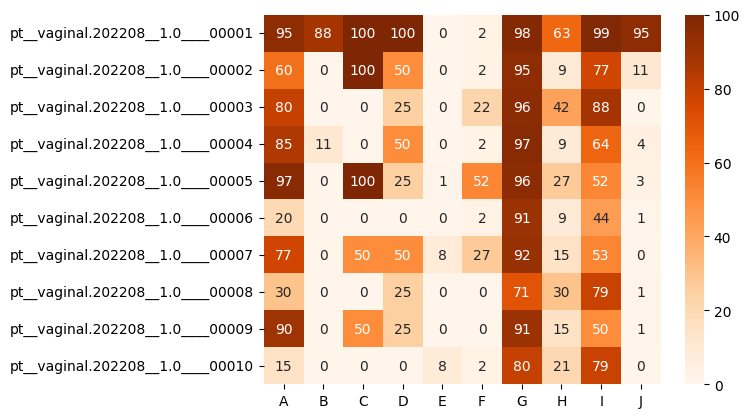

In [24]:
sns.heatmap(
    (pt1e0_prev_by_project[2].iloc[:10] * 100).astype(int),
    cmap='Oranges',
    vmin=0,
    vmax=100,
    annot=True,
    fmt='d'
)

<AxesSubplot: >

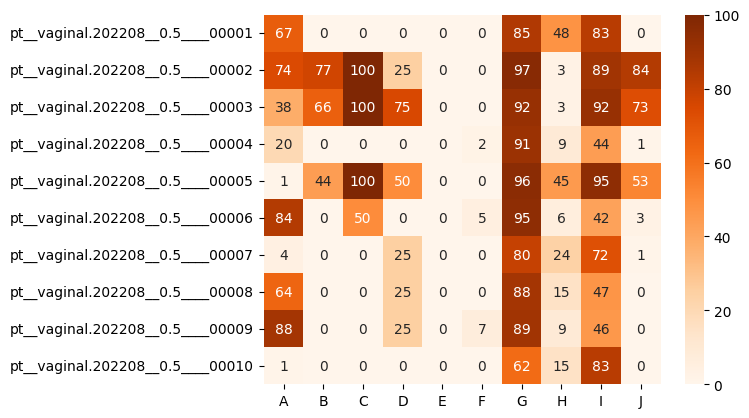

In [25]:
sns.heatmap(
    (pt5e_1_prev_by_project[2].iloc[:10] * 100).astype(int),
    cmap='Oranges',
    vmin=0,
    vmax=100,
    annot=True,
    fmt='d'
)

In [ ]:
fig, axes = plt.subplot_mosaic(
    [
        [1],
        [2],
        [3]
    ],
    figsize=(5,9),
    sharex=True,
)

plt_tm1 = (pt1e_1_prev_by_project[1].iloc[:10] * 100)
plt_tm1[[c for c in projects if c not in plt_tm1.columns]] = np.nan
plt_tm1 = plt_tm1[projects]

sns.heatmap(
    plt_tm1,
    cmap='Oranges',
    vmin=0,
    vmax=100,
    annot=True,
    fmt='.0f',
    ax=axes[1],
    mask=plt_tm1.isna()
)

plt_tm2 = (pt1e_1_prev_by_project[2].iloc[:10] * 100)
plt_tm2[[c for c in projects if c not in plt_tm2.columns]] = np.nan
plt_tm2 = plt_tm2[projects]
sns.heatmap(
    plt_tm2,
    cmap='Oranges',
    vmin=0,
    vmax=100,
    annot=True,
    fmt='.0f',
    ax=axes[2],
    mask=plt_tm2.isna()
)
plt_tm3 = (pt1e_1_prev_by_project[3].iloc[:10] * 100)
plt_tm3[[c for c in projects if c not in plt_tm3.columns]] = np.nan
plt_tm3 = plt_tm3[projects]
sns.heatmap(
    plt_tm3,
    cmap='Oranges',
    vmin=0,
    vmax=100,
    annot=True,
    fmt='.0f',
    ax=axes[3],
    mask=plt_tm3.isna()
)

plt.suptitle("Phylotype (0.1) Prevalance in Term Pregnancy")
axes[1].set_ylabel(None)
axes[1].set_xlabel(None)
axes[1].set_title("First Trimester")
axes[2].set_ylabel(None)
axes[2].set_xlabel(None)
axes[2].set_title("Second Trimester")
axes[3].set_ylabel(None)
axes[3].set_xlabel(None)
axes[3].set_title("Third Trimester")

#plt.tight_layout()

plt.show()

## By race

In [ ]:
race_cat = sorted(md.Race.unique())
race_cat

In [ ]:
# Key is trimester...
pt1e0_prev_by_race = {}
for trimester in [1,2,3]:
    by_race = pd.DataFrame(
        columns=race_cat,
        index=ptw_1e0.columns,
    )
    for rc in race_cat:
        pjw = ptw_1e0.loc[
            md[
                (md.Trimester == trimester) & 
                (md.Race == rc) &
                md.Term #&
                #(md.project != 'E') &
                #(md.project != 'F')
            ].specimen
        ]
        if len(pjw) == 0:  # No specimens that fit this criteria
            by_race.drop(rc, axis=1, inplace=True)
        else:
            by_race[rc] = (pjw >0).sum(axis=0) / len(pjw)
        
    pt1e0_prev_by_race[trimester] = by_race

In [ ]:
# Key is trimester...
pt5e_1_prev_by_race = {}
for trimester in [1,2,3]:
    by_race = pd.DataFrame(
        columns=race_cat,
        index=ptw_5e_1.columns,
    )
    for rc in race_cat:
        pjw = ptw_5e_1.loc[
            md[
                (md.Trimester == trimester) & 
                (md.Race == rc) &
                md.Term # &
                #(md.project != 'E') &
                #(md.project != 'F')
            ].specimen
        ]
        if len(pjw) == 0:  # No specimens that fit this criteria
            by_race.drop(rc, axis=1, inplace=True)
        else:
            by_race[rc] = (pjw >0).sum(axis=0) / len(pjw)
        
    pt5e_1_prev_by_race[trimester] = by_race

In [ ]:
# Key is trimester...
pt1e_1_prev_by_race = {}
for trimester in [1,2,3]:
    by_race = pd.DataFrame(
        columns=race_cat,
        index=ptw_1e_1.columns,
    )
    for rc in race_cat:
        pjw = ptw_1e_1.loc[
            md[
                (md.Trimester == trimester) & 
                (md.Race == rc) &
                md.Term # &
               # (md.project != 'E') &
               # (md.project != 'F')
            ].specimen
        ]
        if len(pjw) == 0:  # No specimens that fit this criteria
            by_race.drop(rc, axis=1, inplace=True)
        else:
            by_race[rc] = (pjw >0).sum(axis=0) / len(pjw)
        
    pt1e_1_prev_by_race[trimester] = by_race

In [ ]:
pt1e_1_prev_by_race[2]

In [ ]:
fig, axes = plt.subplot_mosaic(
    [
        ["Asian"],
        ["Black or African American"],
        ["White"],
    ],
    figsize=(6,9),
    sharex=True,
)
trimester = 1
sns.heatmap(
    pt1e_1_prev_by_race[trimester].sort_values(
        'Asian',
        ascending=False,
    ).iloc[:10][[
        'Asian',
        "Black or African American",
        "White"
    ]] * 100.0,
    cmap='Oranges',
    vmin=0,
    vmax=100,
    annot=True,
    fmt='.0f',
    ax=axes[f'Asian'],
)
sns.heatmap(
    pt1e_1_prev_by_race[trimester].sort_values(
        'Black or African American',
        ascending=False,
    ).iloc[:10][[
        'Asian',
        "Black or African American",
        "White"
    ]] * 100.0,
    cmap='Oranges',
    vmin=0,
    vmax=100,
    annot=True,
    fmt='.0f',
    ax=axes[f'Black or African American'],
)    
sns.heatmap(
    pt1e_1_prev_by_race[trimester].sort_values(
        'White',
        ascending=False,
    ).iloc[:10][[
        'Asian',
        "Black or African American",
        "White"
    ]] * 100.0,
    cmap='Oranges',
    vmin=0,
    vmax=100,
    annot=True,
    fmt='.0f',
    ax=axes[f'White'],
)     
axes[f'Asian'].set_title("Most common in Asian People")
axes[f'Asian'].set_xlabel(None)
axes[f'Asian'].set_ylabel(None)
axes[f'Black or African American'].set_title("Most common in Black People or African Americans")
axes[f'Black or African American'].set_xlabel(None)
axes[f'Black or African American'].set_ylabel(None)
axes[f'White'].set_title("Most common in White People")
axes[f'White'].set_xlabel(None)
axes[f'White'].set_ylabel(None)
plt.suptitle("In the First Trimester")
#plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplot_mosaic(
    [
        ["Asian"],
        ["Black or African American"],
        ["White"],
    ],
    figsize=(6,9),
    sharex=True,
)
trimester = 2
sns.heatmap(
    pt1e_1_prev_by_race[trimester].sort_values(
        'Asian',
        ascending=False,
    ).iloc[:10][[
        'Asian',
        "Black or African American",
        "White"
    ]] * 100.0,
    cmap='Oranges',
    vmin=0,
    vmax=100,
    annot=True,
    fmt='.0f',
    ax=axes[f'Asian'],
)
sns.heatmap(
    pt1e_1_prev_by_race[trimester].sort_values(
        'Black or African American',
        ascending=False,
    ).iloc[:10][[
        'Asian',
        "Black or African American",
        "White"
    ]] * 100.0,
    cmap='Oranges',
    vmin=0,
    vmax=100,
    annot=True,
    fmt='.0f',
    ax=axes[f'Black or African American'],
)    
sns.heatmap(
    pt1e_1_prev_by_race[trimester].sort_values(
        'White',
        ascending=False,
    ).iloc[:10][[
        'Asian',
        "Black or African American",
        "White"
    ]] * 100.0,
    cmap='Oranges',
    vmin=0,
    vmax=100,
    annot=True,
    fmt='.0f',
    ax=axes[f'White'],
)     
axes[f'Asian'].set_title("Most common in Asian People")
axes[f'Asian'].set_xlabel(None)
axes[f'Asian'].set_ylabel(None)
axes[f'Black or African American'].set_title("Most common in Black People or African Americans")
axes[f'Black or African American'].set_xlabel(None)
axes[f'Black or African American'].set_ylabel(None)
axes[f'White'].set_title("Most common in White People")
axes[f'White'].set_xlabel(None)
axes[f'White'].set_ylabel(None)
plt.suptitle("In the Second Trimester")
#plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplot_mosaic(
    [
        ["Asian"],
        ["Black or African American"],
        ["White"],
    ],
    figsize=(6,9),
    sharex=True,
)
trimester = 3
sns.heatmap(
    pt1e_1_prev_by_race[trimester].sort_values(
        'Asian',
        ascending=False,
    ).iloc[:10][[
        'Asian',
        "Black or African American",
        "White"
    ]] * 100.0,
    cmap='Oranges',
    vmin=0,
    vmax=100,
    annot=True,
    fmt='.0f',
    ax=axes[f'Asian'],
)
sns.heatmap(
    pt1e_1_prev_by_race[trimester].sort_values(
        'Black or African American',
        ascending=False,
    ).iloc[:10][[
        'Asian',
        "Black or African American",
        "White"
    ]] * 100.0,
    cmap='Oranges',
    vmin=0,
    vmax=100,
    annot=True,
    fmt='.0f',
    ax=axes[f'Black or African American'],
)    
sns.heatmap(
    pt1e_1_prev_by_race[trimester].sort_values(
        'White',
        ascending=False,
    ).iloc[:10][[
        'Asian',
        "Black or African American",
        "White"
    ]] * 100.0,
    cmap='Oranges',
    vmin=0,
    vmax=100,
    annot=True,
    fmt='.0f',
    ax=axes[f'White'],
)     
axes[f'Asian'].set_title("Most common in Asian People")
axes[f'Asian'].set_xlabel(None)
axes[f'Asian'].set_ylabel(None)
axes[f'Black or African American'].set_title("Most common in Black People or African Americans")
axes[f'Black or African American'].set_xlabel(None)
axes[f'Black or African American'].set_ylabel(None)
axes[f'White'].set_title("Most common in White People")
axes[f'White'].set_xlabel(None)
axes[f'White'].set_ylabel(None)
plt.suptitle("In the Third Trimester")
#plt.tight_layout()
plt.show()

## By age

In [ ]:
age_cat = sorted(md.Age_Category.unique())
age_cat

In [ ]:
# Key is trimester...
pt1e0_prev_by_age = {}
for trimester in [1,2,3]:
    by_age = pd.DataFrame(
        columns=age_cat,
        index=ptw_1e0.columns,
    )
    for ac in age_cat:
        pjw = ptw_1e0.loc[
            md[
                (md.Trimester == trimester) & 
                (md.Age_Category == ac) &
                md.Term #&
                #(md.project != 'E') &
                #(md.project != 'F')
            ].specimen
        ]
        if len(pjw) == 0:  # No specimens that fit this criteria
            by_age.drop(ac, axis=1, inplace=True)
        else:
            by_age[ac] = (pjw >0).sum(axis=0) / len(pjw)
        
    pt1e0_prev_by_age[trimester] = by_age

In [ ]:
# Key is trimester...
pt5e_1_prev_by_age = {}
for trimester in [1,2,3]:
    by_age = pd.DataFrame(
        columns=age_cat,
        index=ptw_5e_1.columns,
    )
    for ac in age_cat:
        pjw = ptw_5e_1.loc[
            md[
                (md.Trimester == trimester) & 
                (md.Age_Category == ac) &
                md.Term #&
                #(md.project != 'E') &
                #(md.project != 'F')
            ].specimen
        ]
        if len(pjw) == 0:  # No specimens that fit this criteria
            by_age.drop(ac, axis=1, inplace=True)
        else:
            by_age[ac] = (pjw >0).sum(axis=0) / len(pjw)
        
    pt5e_1_prev_by_age[trimester] = by_age

In [ ]:
# Key is trimester...
pt1e_1_prev_by_age = {}
for trimester in [1,2,3]:
    by_age = pd.DataFrame(
        columns=age_cat,
        index=ptw_1e_1.columns,
    )
    for ac in age_cat:
        pjw = ptw_1e_1.loc[
            md[
                (md.Trimester == trimester) & 
                (md.Age_Category == ac) &
                md.Term #&
                #(md.project != 'E') &
                #(md.project != 'F')
            ].specimen
        ]
        if len(pjw) == 0:  # No specimens that fit this criteria
            by_age.drop(ac, axis=1, inplace=True)
        else:
            by_age[ac] = (pjw >0).sum(axis=0) / len(pjw)
        
    pt1e_1_prev_by_age[trimester] = by_age

In [ ]:
 pt1e_1_prev_by_age[1]

In [ ]:
fig, axes = plt.subplot_mosaic(
    [
#        ['Below 18'],
        ['18 to 38'],
        ['Above 38'],
    ],
    figsize=(6,9),
    sharex=True,
)
trimester = 1
"""
sns.heatmap(
    pt1e_1_prev_by_age[trimester].sort_values(
        'Below 18',
        ascending=False,
    ).iloc[:10][[
        #'Below 18',
        '18 to 38',
        'Above 38'
    ]] * 100.0,
    cmap='Oranges',
    vmin=0,
    vmax=100,
    annot=True,
    fmt='.0f',
    ax=axes['Below 18'],
)
"""
sns.heatmap(
    pt1e_1_prev_by_age[trimester].sort_values(
        '18 to 38',
        ascending=False,
    ).iloc[:10][[
        #'Below 18',
        '18 to 38',
        'Above 38'
    ]] * 100.0,
    cmap='Oranges',
    vmin=0,
    vmax=100,
    annot=True,
    fmt='.0f',
    ax=axes['18 to 38'],
)    
sns.heatmap(
    pt1e_1_prev_by_age[trimester].sort_values(
        'Above 38',
        ascending=False,
    ).iloc[:10][[
        #'Below 18',
        '18 to 38',
        'Above 38'
    ]] * 100.0,
    cmap='Oranges',
    vmin=0,
    vmax=100,
    annot=True,
    fmt='.0f',
    ax=axes['Above 38'],
)       
#axes['Below 18'].set_title("By Below 18")
axes['18 to 38'].set_title("By 18 to 38")
axes['Above 38'].set_title("By Above 38")

plt.suptitle("In the First Trimester")
#plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplot_mosaic(
    [
       ['Below 18'],
        ['18 to 38'],
        ['Above 38'],
    ],
    figsize=(6,9),
    sharex=True,
)
trimester = 2

sns.heatmap(
    pt1e_1_prev_by_age[trimester].sort_values(
        'Below 18',
        ascending=False,
    ).iloc[:10][[
        'Below 18',
        '18 to 38',
        'Above 38'
    ]] * 100.0,
    cmap='Oranges',
    vmin=0,
    vmax=100,
    annot=True,
    fmt='.0f',
    ax=axes['Below 18'],
)

sns.heatmap(
    pt1e_1_prev_by_age[trimester].sort_values(
        '18 to 38',
        ascending=False,
    ).iloc[:10][[
        'Below 18',
        '18 to 38',
        'Above 38'
    ]] * 100.0,
    cmap='Oranges',
    vmin=0,
    vmax=100,
    annot=True,
    fmt='.0f',
    ax=axes['18 to 38'],
)    
sns.heatmap(
    pt1e_1_prev_by_age[trimester].sort_values(
        'Above 38',
        ascending=False,
    ).iloc[:10][[
        'Below 18',
        '18 to 38',
        'Above 38'
    ]] * 100.0,
    cmap='Oranges',
    vmin=0,
    vmax=100,
    annot=True,
    fmt='.0f',
    ax=axes['Above 38'],
)       
axes['Below 18'].set_title("By Below 18")
axes['18 to 38'].set_title("By 18 to 38")
axes['Above 38'].set_title("By Above 38")

plt.suptitle("In the Second Trimester")
#plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplot_mosaic(
    [
       ['Below 18'],
        ['18 to 38'],
        ['Above 38'],
    ],
    figsize=(6,9),
    sharex=True,
)
trimester = 3

sns.heatmap(
    pt1e_1_prev_by_age[trimester].sort_values(
        'Below 18',
        ascending=False,
    ).iloc[:10][[
        'Below 18',
        '18 to 38',
        'Above 38'
    ]] * 100.0,
    cmap='Oranges',
    vmin=0,
    vmax=100,
    annot=True,
    fmt='.0f',
    ax=axes['Below 18'],
)

sns.heatmap(
    pt1e_1_prev_by_age[trimester].sort_values(
        '18 to 38',
        ascending=False,
    ).iloc[:10][[
        'Below 18',
        '18 to 38',
        'Above 38'
    ]] * 100.0,
    cmap='Oranges',
    vmin=0,
    vmax=100,
    annot=True,
    fmt='.0f',
    ax=axes['18 to 38'],
)    
sns.heatmap(
    pt1e_1_prev_by_age[trimester].sort_values(
        'Above 38',
        ascending=False,
    ).iloc[:10][[
        'Below 18',
        '18 to 38',
        'Above 38'
    ]] * 100.0,
    cmap='Oranges',
    vmin=0,
    vmax=100,
    annot=True,
    fmt='.0f',
    ax=axes['Above 38'],
)       
axes['Below 18'].set_title("By Below 18")
axes['18 to 38'].set_title("By 18 to 38")
axes['Above 38'].set_title("By Above 38")

plt.suptitle("In the Third Trimester")
#plt.tight_layout()
plt.show()